# Preprocessing

In [36]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image,display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [37]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [38]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [40]:
### date column into time stamp format

df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [41]:
# get the number of rows and columns

df.shape

(19735, 29)

In [42]:
# get the column data types

df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [43]:
# get a count of the empty values for each columns

df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [44]:
#check for any missing or null values

df.isnull().values.any()

False

<AxesSubplot:xlabel='date'>

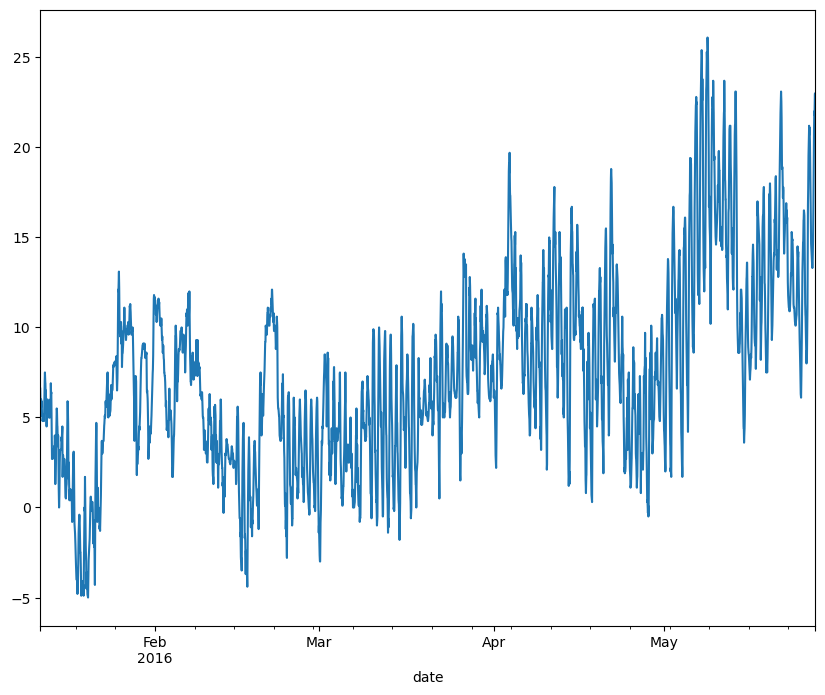

In [45]:
### Ploting temp output

df.set_index('date')['T_out'].plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

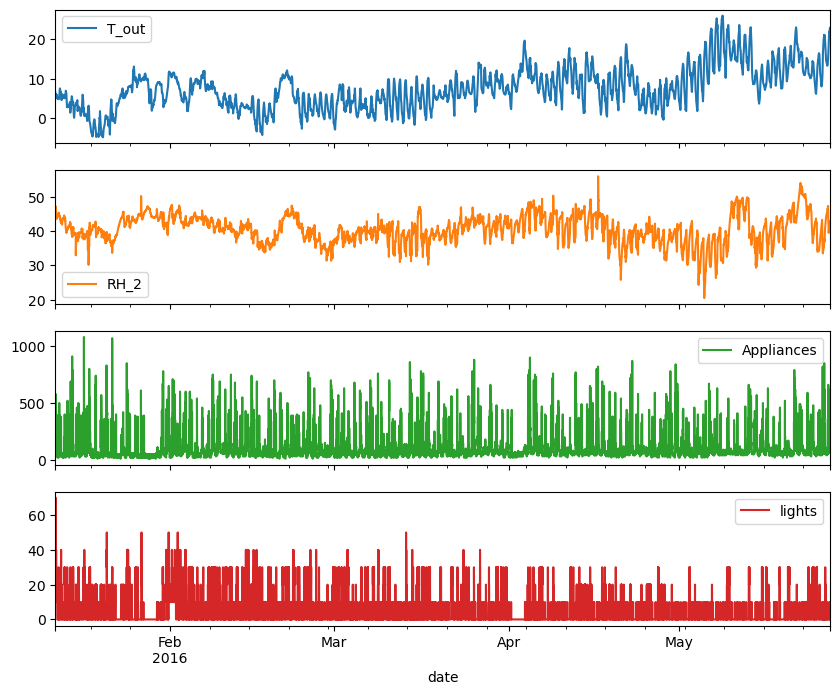

In [46]:
### corelation of some features


df.set_index('date')[['T_out','RH_2','Appliances','lights']].plot(subplots = True)

This line plots the T_out, RH_2, Appliances, and lights columns in the DataFrame, with the date column as the index. The subplots=True argument tells Pandas to plot each column on a separate subplot.

In [47]:
## prints the number of non-null values in each column of the DataFrame.

df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [48]:
features = df[['Appliances','T_out','RH_2']].to_numpy().tolist()
target = df['Appliances'].tolist()

he first line of code (features = df[['Appliances','T_out','RH_2']].to_numpy().tolist()) extracts the Appliances, T_out, and RH_2 columns from the DataFrame and converts them to a list of lists. The to_numpy() function converts the DataFrame to a NumPy array, and the tolist() function converts the NumPy array to a list of lists.

The second line of code (target = df['Appliances'].tolist()) extracts the Appliances column from the DataFrame and converts it to a list.

The features and target variables can then be used to train a machine learning model to predict energy consumption.

The features variable will be used as the input to the machine learning model, and the target variable will be used as the output to the machine learning model.

In [49]:
# list of the first 11 elements of the features variable.

features[0:11]

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [50]:
#list of the first 11 elements of the target variable.

target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [51]:
## Time series generator

ts_generator = TimeseriesGenerator(features ,target , length = 6 , sampling_rate=1 , batch_size=1 )

In [52]:
ts_generator

In [53]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [54]:
ts_generator[10]

(array([[[230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ],
         [430.        ,   6.        ,  44.4       ],
         [250.        ,   6.        ,  45.1       ],
         [100.        ,   6.        ,  45.83333333],
         [100.        ,   6.        ,  46.75666667]]]),
 array([90]))

In [55]:
### adding stride for ts generator

ts_generator = TimeseriesGenerator(features ,target , length = 6 , sampling_rate=1 , batch_size=1  , stride=2)

The stride of a TimeseriesGenerator object is the period between successive output sequences. For example, if the stride is 2, then the output sequences will be centered around data[i], data[i+2], data[i+4], and so on.

In [56]:
#number of sequences that the ts_generator object can generate.

len(ts_generator)

9865

In [57]:
# prepare for multi target

multi_target = pd.concat([df['Appliances'] ,df['Appliances'].shift(-1),df['Appliances'].shift(-2)] ,axis = 1).dropna().to_numpy().tolist()

creates a list of lists, where each inner list contains the Appliances value for the current data point, the Appliances value for the previous data point, and the Appliances value for the previous-previous data point.

The pd.concat() function is used to concatenate the three Appliances columns into a single DataFrame. The axis parameter specifies that the columns should be concatenated along the axis 1, which means that the columns will be stacked horizontally.

The dropna() function is used to drop any rows from the DataFrame that contain missing values.

The to_numpy().tolist() function is used to convert the DataFrame to a NumPy array and then to a list of lists.

In [58]:
multi_target[0:10]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0]]

In [59]:
ts_generator2 = TimeseriesGenerator(features[:-2] ,multi_target , length = 6 , sampling_rate=1 , batch_size=1  , stride=2)

In [60]:
ts_generator2[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([[ 60.,  70., 230.]]))

used to generate sequences for training a machine learning model to predict energy consumption for the next three data points based on the previous six data points.

The features[:-2] argument specifies that the first two features should be removed from the features list. This is because the multi_target list contains the Appliances value for the current data point, the Appliances value for the previous data point, and the Appliances value for the previous-previous data point.

The multi_target argument specifies that the multi_target list should be used as the target for the TimeseriesGenerator object

# Data Modeling

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [63]:
df_input = df[['Appliances','T_out' , 'RH_1' , 'Visibility']]

In [64]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [66]:
### summary

df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [67]:
df_input.query('Appliances>500')

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [68]:
## scale value

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

The code data_scaled = scaler.fit_transform(df_input) uses the MinMaxScaler object to scale the df_input DataFrame. The fit_transform() function first fits the scaler to the data, and then transforms the data using the fitted scaler.

The MinMaxScaler object scales the data to the range [0, 1]. This means that the minimum value in the data will be scaled to 0 and the maximum value in the data will be scaled to 1.

In [69]:
print(data_scaled)

[[0.04672897 0.37299035 0.56618659 0.95384615]
 [0.04672897 0.36923901 0.54132648 0.89487179]
 [0.03738318 0.36548767 0.53050179 0.83589744]
 ...
 [0.24299065 0.88317256 0.53866618 0.37435897]
 [0.38317757 0.87888532 0.54949087 0.38717949]
 [0.39252336 0.87459807 0.53875791 0.4       ]]


In [70]:
features = data_scaled
target = data_scaled[:,0]

### Split the data into training and testing

In [71]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 123 , shuffle = False)

In [72]:
x_train.shape

(15788, 4)

In [73]:
x_test.shape

(3947, 4)

In [74]:
win_length = 720
b_size = 32
num_features = 4

train_generator = TimeseriesGenerator(x_train , y_train , length=win_length , sampling_rate= 1 , batch_size= b_size )
test_generator = TimeseriesGenerator(x_test , y_test , length=win_length , sampling_rate= 1 , batch_size= b_size )

In [75]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

### Model Create

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape = (win_length , num_features) , return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128 , return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64 , return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True)): This line adds an LSTM (Long Short-Term Memory) layer with 128 units to the model. It takes input sequences of shape (win_length, num_features) and returns sequences as output (due to return_sequences=True). LSTM is a type of recurrent neural network (RNN) that is good for processing sequential data.

model.add(tf.keras.layers.LeakyReLU(alpha=0.5)): After each LSTM layer, a Leaky ReLU activation function is applied. Leaky ReLU is a type of activation function that allows a small gradient when the unit is not active, which can help with training deep networks.

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### Model Compile

In [79]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode = 'min')


model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator , epochs=1,#should be 50
                              validation_data=test_generator,
                              shuffle= False,
                              callbacks = [early_stopping]
                              )

C:\Users\dulara\AppData\Local\Temp\ipykernel_11416\3428011652.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator , epochs=1,#should be 50


471/471 [==============================] - 691s 1s/step - loss: 0.0086 - mean_absolute_error: 0.0511 - val_loss: 0.0058 - val_mean_absolute_error: 0.0496


In [80]:
model.evaluate_generator(test_generator , verbose=0)

C:\Users\dulara\AppData\Local\Temp\ipykernel_11416\4165518954.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator , verbose=0)


[0.00578142236918211, 0.0496220737695694]

In [81]:
## prediction
prediction = model.predict_generator(test_generator)

C:\Users\dulara\AppData\Local\Temp\ipykernel_11416\4012717064.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(test_generator)


In [82]:
# scaled prediction
prediction

array([[0.10244213],
       [0.0997974 ],
       [0.09761737],
       ...,
       [0.12789524],
       [0.12969638],
       [0.1385319 ]], dtype=float32)